# Clean dataset
1. Filter outlier
 * Get percentile between 25 - 75 %
 * plot boxplot 
2. Get number charector in filename upper 3
3. Use only Thai filname   
** FILENAME IS LABEL **

In [1]:
import pandas as pd
import numpy as np
import cv2
import glob
import os
import tqdm
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/Relation.csv")

In [157]:
num = 9
floder = "../data"
Collect = pd.read_csv(f"{floder}/Collect_{num}/length.csv")

data = Collect_1["durations"]

# Calculate quartiles and IQR
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
filtered_data = [x for x in data if x >= lower_bound and x <= upper_bound]

dura_data = Collect[Collect["durations"] <= upper_bound]

<Axes: >

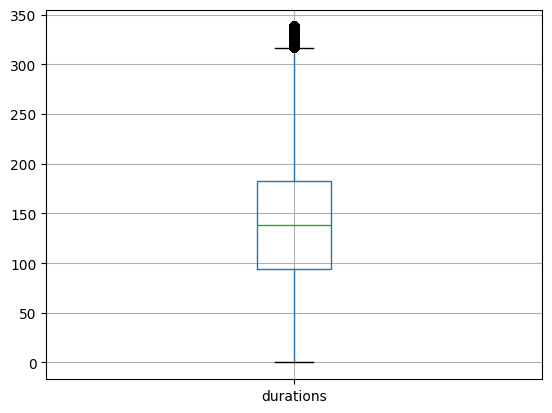

In [158]:
plt.figure()
dura_data.boxplot(column = ["durations"])

In [159]:
clean = dura_data[(dura_data["durations"] <= 200) & (dura_data["durations"] > 75)]
clean = clean[clean["video"].apply(lambda x: len(x.split('-')[-1].split('.')[0])) > 3]
clean = clean[clean["video"].apply(lambda x: bool(re.match(r'^[\u0E00-\u0E7F\s]+$', x.split('-')[-1].split('.')[0])))]

In [160]:
clean.to_csv(f"{floder}/Collect_{num}/Clean_length.csv", index=False)